<a href="https://colab.research.google.com/github/bala-codes/MALARIA-CELLS-PARASITE-CLASSIFIER-USING-DEEP-LEARNING/blob/master/codes%20(FASTAI)/2.%20Malaria%20Cell%20Classifier%20FASTAI%20VGG19_bn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Check if fastai and pytorch are installed
# !pip list | grep -e fastai -e torch -e torchvision

# If not, uncomment this line and run to install them
# !pip install torch torchvision fastai


In [ ]:
%%time

import os
labels = os.listdir("/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/")
print("No. of labels: {}".format(len(labels)))
print("-----------------")

for label in labels:
    print("{}, {} files".format(label, len(os.listdir("/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/"+label))))

No. of labels: 2
-----------------
Parasitized, 13780 files
Uninfected, 13780 files
CPU times: user 8.48 ms, sys: 3.8 ms, total: 12.3 ms
Wall time: 167 ms


Populating the interactive namespace from numpy and matplotlib


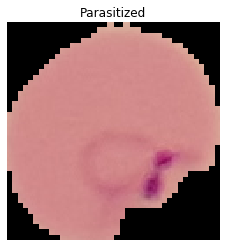

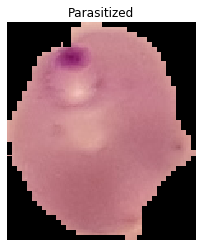

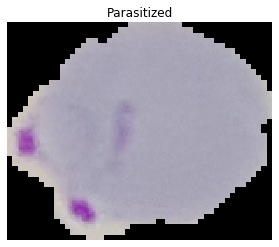

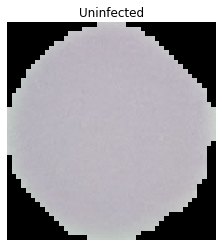

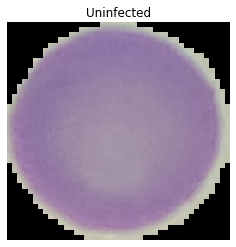

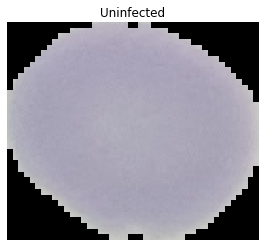

CPU times: user 391 ms, sys: 42.3 ms, total: 433 ms
Wall time: 4.03 s


In [ ]:
%%time
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(2):
  for j in range(3):
    image_name = np.random.choice(os.listdir("/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/" + labels[i]))
    img = mpimg.imread(os.path.join('/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/',labels[i],image_name))
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis('off')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.style.use('ggplot')

def plotter(prediction):
  prediction1 = prediction
  final = str(prediction1[0])
  scores = prediction1[2]
  a = float((scores[0]))
  b = float((scores[1]))

  start = "\033[1m"
  end = "\033[0;0m"
  print("OUTPUT - "+ start + str(final) + end)
  print()
  class_labels = ['INFECTED','UNINFECTED']
  j = [a,b]
  y_pos = np.arange(len(class_labels))
  colors = ['r', 'g']
  plt.barh(y_pos, j, color = colors, alpha=0.6)
  plt.yticks(y_pos,class_labels)
  plt.title('PREDICTION FOR BEING AFFECTED BY MALARIA')
  plt.ylabel('Percentage')
  plt.xlabel('Labels')
  plt.show()

In [ ]:
from fastai import *
from fastai.vision import *
from fastai.core import *
from fastai.metrics import accuracy

In [ ]:
path = "/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/"
size = 128
bs = 64

In [ ]:
%%time
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=True, flip_vert=True), valid_pct=0.2, size=size, bs=bs)

CPU times: user 1.96 s, sys: 61.8 ms, total: 2.02 s
Wall time: 23.1 s


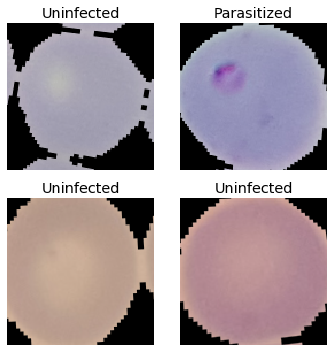

In [ ]:
data.show_batch(rows=2, figsize=(5,5))

In [ ]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (22047 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Parasitized,Parasitized,Parasitized,Parasitized,Parasitized
Path: /content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES;

Valid: LabelList (5511 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Uninfected,Parasitized,Uninfected,Parasitized,Parasitized
Path: /content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES;

Test: None

In [ ]:
data.classes

['Parasitized', 'Uninfected']

The fastai library includes several pretrained models from torchvision

resnet18, resnet34, resnet50, resnet101, resnet152
squeezenet1_0, squeezenet1_1
densenet121, densenet169, densenet201, densenet161
vgg16_bn, vgg19_bn
alexnet

In [ ]:
learner = cnn_learner(data, models.vgg19_bn, metrics=[accuracy], callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:05<00:00, 110MB/s]


In [ ]:
learner.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilat

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.02E-03
Min loss divided by 10: 1.20E-02
CPU times: user 8.27 s, sys: 5.13 s, total: 13.4 s
Wall time: 8min 53s


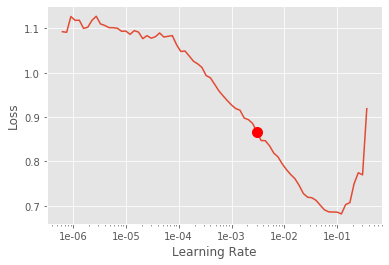

In [ ]:
%%time
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [ ]:
min_grad_lr = learner.recorder.min_grad_lr
min_grad_lr

0.0030199517204020187

epoch,train_loss,valid_loss,accuracy,time
0,0.228936,0.148719,0.950826,32:40
1,0.186322,0.140110,0.954455,01:47
2,0.164182,0.100813,0.965886,01:45
3,0.126048,0.106489,0.964072,01:45
4,0.125442,0.096085,0.965886,01:44
5,0.112395,0.090867,0.967157,01:43
6,0.099622,0.086127,0.968971,01:42
7,0.112910,0.110898,0.970060,01:42
8,0.107053,0.081797,0.970060,01:41
9,0.088188,0.082826,0.969153,01:41


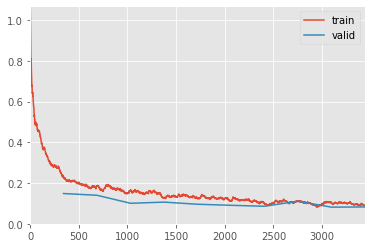

CPU times: user 5min 53s, sys: 3min 7s, total: 9min
Wall time: 48min 15s


In [ ]:
%%time
learner.fit_one_cycle(10, max_lr=slice(1e-3, 1e-2))

In [ ]:
learner.export()

In [ ]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('Uninfected', 'Parasitized', 96), ('Parasitized', 'Uninfected', 74)]

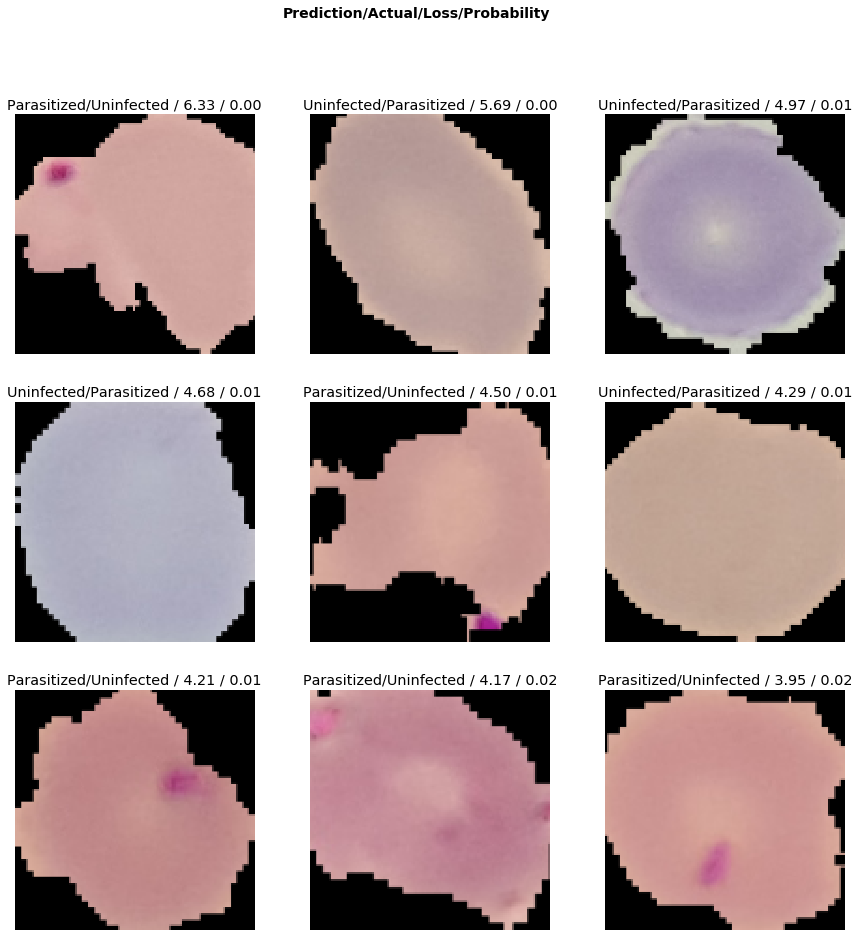

In [ ]:
interpreter.plot_top_losses(9, figsize=(15,15), heatmap = False)

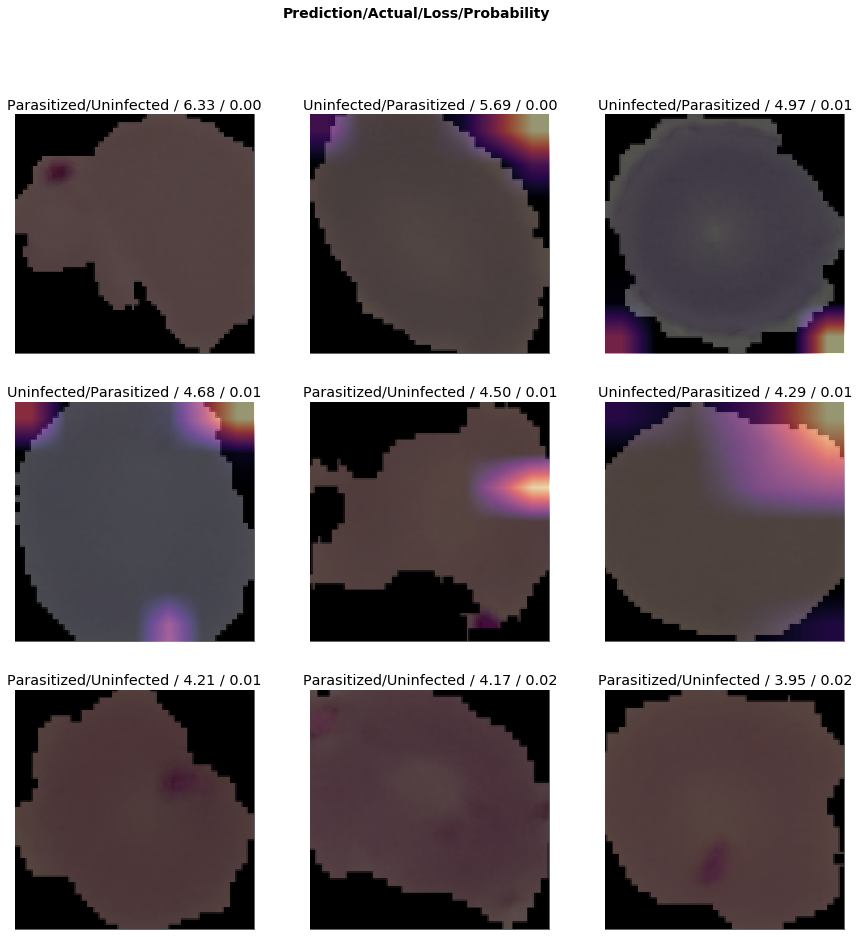

In [ ]:
interpreter.plot_top_losses(9, figsize=(15,15), heatmap = True)

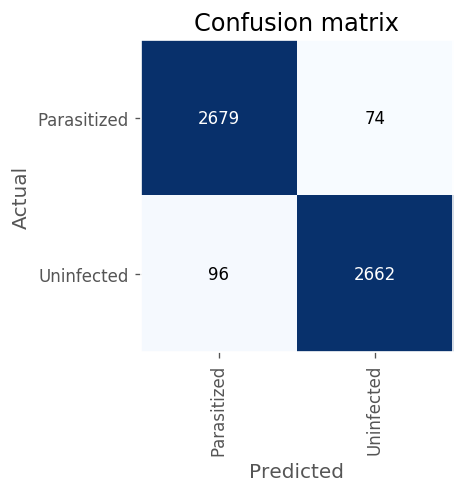

In [ ]:
interpreter.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [ ]:
learner.save('/content/malaria_model_fastai-vgg19-stage1')
#learner.load(‘stage-1’)

epoch,train_loss,valid_loss,accuracy,time
0,0.148664,0.130328,0.958447,01:46
1,0.161186,0.635601,0.954636,01:46
2,0.172501,0.145883,0.953910,01:45
3,0.167479,0.328348,0.951733,01:44
4,0.185521,8.281213,0.831791,01:45
5,0.149137,0.152336,0.955543,01:45
6,0.150334,0.111538,0.964616,01:45
7,0.149406,0.165564,0.951007,01:45
8,0.132155,0.120200,0.960806,01:45
9,0.137860,0.101257,0.966068,01:45


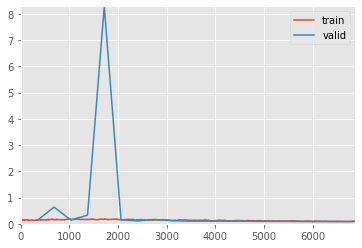

CPU times: user 16min 34s, sys: 8min 51s, total: 25min 26s
Wall time: 35min 33s


In [ ]:
%%time
from fastai.callbacks import *

learner.unfreeze()
learner.fit_one_cycle(20, callbacks=[SaveModelCallback(learner, every='epoch', monitor='accuracy', name='malaria-vgg19-epoch')], max_lr=slice(1e-3, 1e-2)) # 1e-5, 1e-

epoch,train_loss,valid_loss,accuracy,time
0,0.090417,0.088703,0.966794,01:44
1,0.120713,0.100706,0.966068,01:44
2,0.140380,0.110383,0.962620,01:46
3,0.134584,0.118770,0.962620,01:45
4,0.117737,0.103301,0.963346,01:45
5,0.116622,0.100675,0.964435,01:46
6,0.097389,0.083627,0.969334,01:45
7,0.105093,0.081097,0.969697,01:45
8,0.093567,0.081462,0.971330,01:46
9,0.096598,0.080545,0.971512,01:45


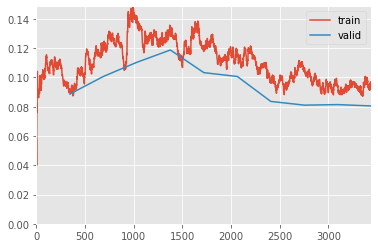

In [ ]:
learner.fit_one_cycle(20, callbacks=[SaveModelCallback(learner, every='epoch', monitor='accuracy', name='malaria-vgg19-epoch')], max_lr=slice(1e-3, 1e-2)) # 1e-5, 1e-

epoch,train_loss,valid_loss,accuracy,time
0,0.072638,0.071887,0.974959,01:47
1,0.071043,0.070714,0.976592,01:47
2,0.076983,0.074616,0.976774,01:45
3,0.080815,0.080071,0.972056,01:45
4,0.083330,0.081515,0.972237,01:45
5,0.095381,0.084721,0.973326,01:44
6,0.098193,0.086983,0.969334,01:44
7,0.097047,0.086741,0.970060,01:45
8,0.110921,0.086358,0.968427,01:44
9,0.105749,0.100506,0.966794,01:44


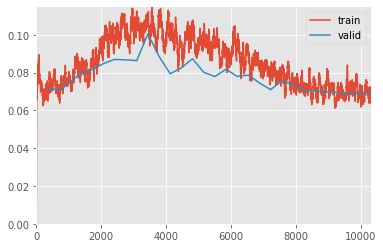

Better model found at epoch 0 with accuracy value: 0.9749591946601868.
Better model found at epoch 1 with accuracy value: 0.9765922427177429.
Better model found at epoch 2 with accuracy value: 0.976773738861084.
Epoch 4: reducing lr to 0.0012067022505602534
Epoch 7: reducing lr to 0.0019421049159544725
Epoch 10: reducing lr to 0.001955572983494918
Epoch 13: reducing lr to 0.0017330529396223393
Epoch 16: reducing lr to 0.0013653435630022982
Epoch 19: reducing lr to 0.0009252742053339503
Epoch 22: reducing lr to 0.0005000060000000004
Better model found at epoch 26 with accuracy value: 0.9773181080818176.


In [ ]:
learner.fit_one_cycle(30, max_lr=slice(1e-3, 1e-2), callbacks=[SaveModelCallback(learner, every='improvement', monitor='accuracy', name='malaria-vgg19x2-epoch'),
                                                               ReduceLROnPlateauCallback(learner, monitor = 'valid_loss', mode = 'auto', patience = 2, factor = 0.2, min_delta = 0.0001, min_lr = 0.001)]) # 1e-5, 1e-

# 29	0.071339	0.071928	0.976048	01:43

In [ ]:
learner.save('/content/malaria_model_fastai-vgg19-stage6')

In [ ]:
# learner.load('/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/models/malaria-vgg19-epoch')
learner.export()
learner.save('/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/models/malaria_model_fastai-vgg19-acc-9771')

interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('Parasitized', 'Uninfected', 73), ('Uninfected', 'Parasitized', 50)]

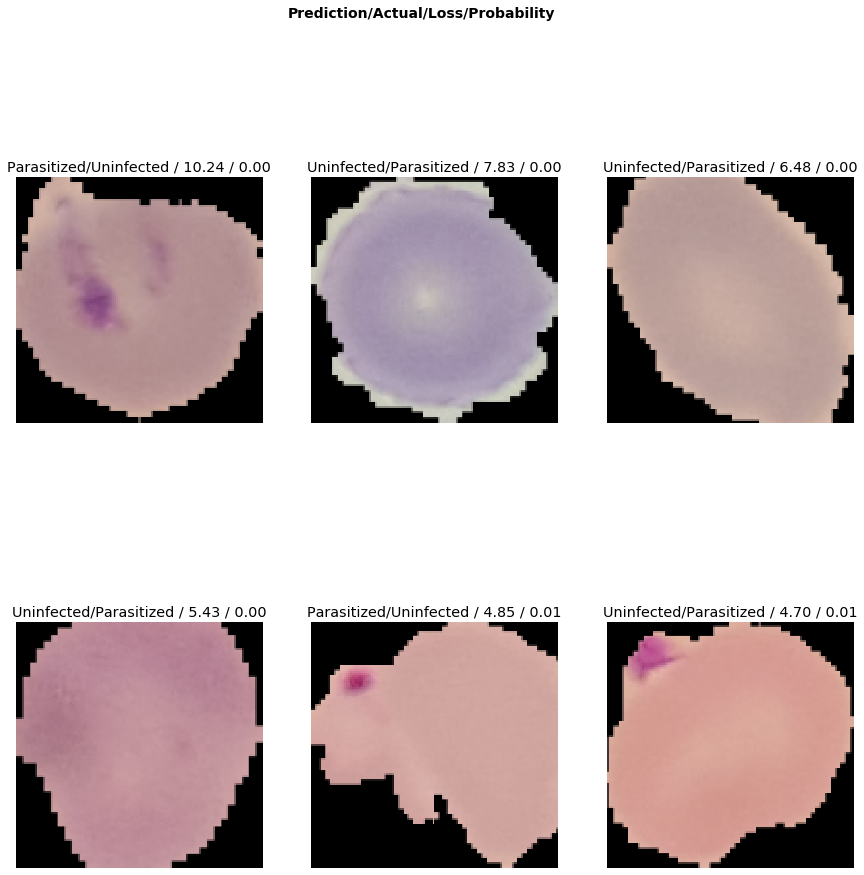

In [ ]:
interpreter.plot_top_losses(6, figsize=(15,15), heatmap = False)

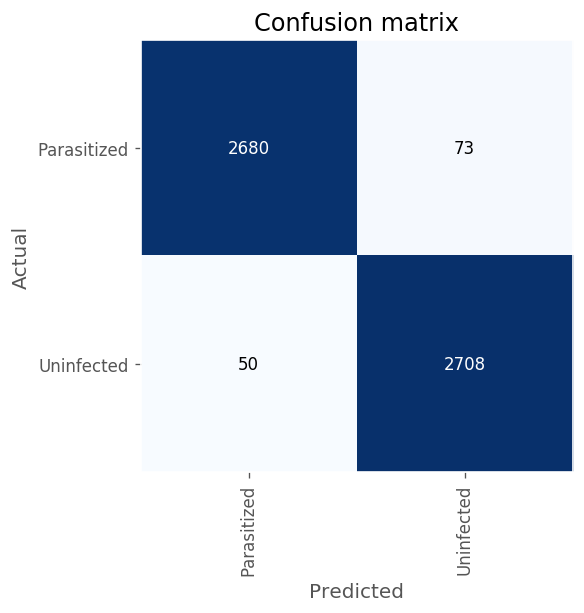

In [ ]:
interpreter.plot_confusion_matrix(figsize=(5,5), dpi=120)

# Loading Pretrained Model Files

In [ ]:
learnerfinal = learner.load("/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/models/malaria-vgg19-epoch_8")

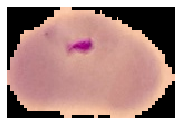

In [ ]:
testimg = open_image("/content/PARC33P1thinF_IMG_20150619_120645a_cell_216.png")
testimg.show()

OUTPUT - Parasitized



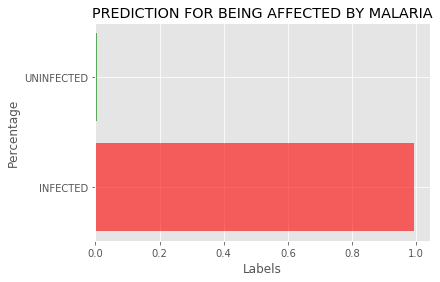

CPU times: user 134 ms, sys: 1.53 ms, total: 135 ms
Wall time: 113 ms


In [ ]:
%%time
prediction = learnerfinal.predict(testimg)
plotter(prediction)

MODEL 1


MODEL 2


CPU times: user 8.61 s, sys: 5.28 s, total: 13.9 s
Wall time: 35.3 s


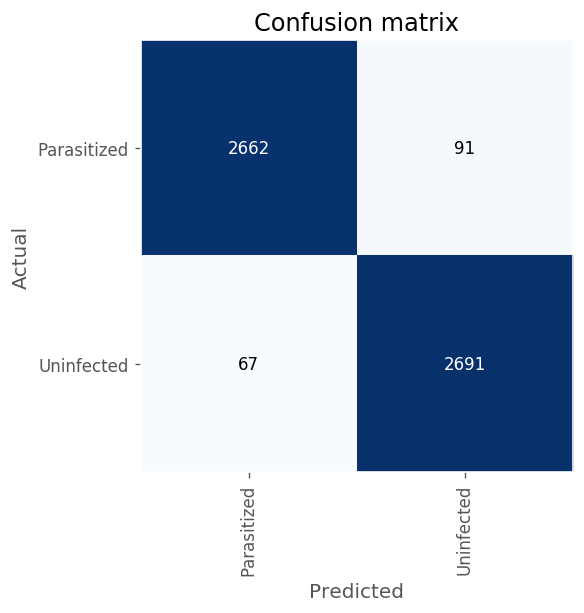

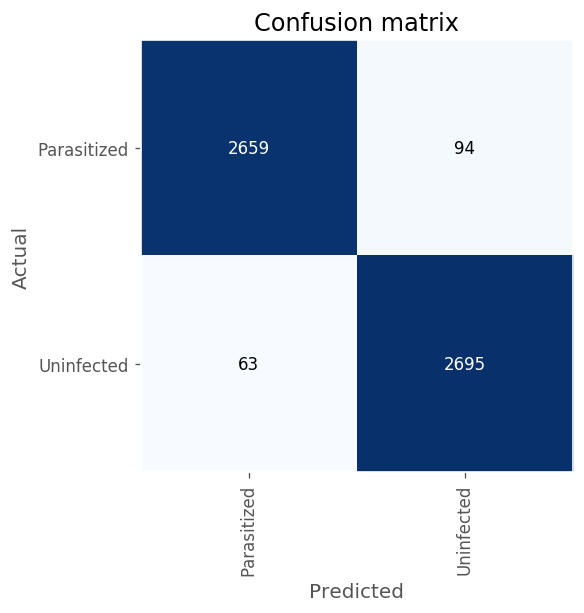

In [ ]:
%%time
X = ['malaria-vgg19-epoch_8','malaria-vgg19-epoch_9']
def confusion_matrix(PATHS):
  learner2 = learner.load(PATHS)
  interpreter = ClassificationInterpretation.from_learner(learner2)
  interpreter.most_confused(min_val=2)
  interpreter.plot_confusion_matrix(figsize=(5,5), dpi=120)


for i in range(len(X)):
  y = X[i]
  x = '/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/models/' + y
  print("MODEL {}".format(i+1))
  confusion_matrix(PATHS = x)

In [ ]:
import scikitplot 
%matplotlib inline

#y_true = # ground truth labels
#y_probas = # predicted probabilities generated by sklearn classifier
y_probas = model.predict(X_test)
scikitplot.metrics.plot_roc(y_true, y_probas)
plt.figure(figsize=(50, 5)) 
#plt.legend(fontsize = 'xx-small')
plt.show()